<a href="https://colab.research.google.com/github/syzygy21/Customer-prediction-through-Artificial-neural-networks/blob/main/control_paper_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sp
t = sp.Symbol('time')
xc = sp.Symbol('x position')
yc = sp.Symbol('y position')
thetac = sp.Symbol ('orientation')
Vc = sp.Symbol('Velocity')
Wc = sp.Symbol('angular velocity')
m = sp.Symbol('mass')
I = sp.Symbol('Inertia')
r = sp.Matrix('Radius of driving wheels')
l = sp.Matrix('azimuth length from C')
Pc = sp.Matrix ([[xc , yc , thetac]])
tao_r = sp.Matrix('Torque of right wheel')
tao_l = sp.Matrix('Torque of left wheel')
xc_dot = sp.Symbol('change in x')
yc_dot = sp.Symbol('change in y')
thetac_dot = sp.Symbol('change in orientation')

Eq = yc_dot * sp.cos(thetac) - xc_dot * sp.sin(thetac)


jacobian = sp.Matrix ([sp.cos (thetac) , 0] , [sp.sin(thetac) , 0] , [0 , 1])

control_inputs = sp.Matrix([[Vc , Wc]])

conrol_inputs = sp.Transpose(control_inputs)

Pc_dot = jacobian * control_inputs

M = sp.Matrix([[m , 0] , [0 , I]])

M_inverse = sp.Matrix([[1/m , 0] , [0 , -I]])

B = sp.Matrix([[1/r , 1/r] , [l/r , l/r]])

tao_c = sp.Matrix([[tao_r , tao_l]])

tao_c = sp.Transpose(tao_c)

control_input_dot = M_inverse * B * tao_c


print()

TypeError: ignored

In [ ]:
import numpy as np

# offsets of each variable in the state vector

class KF:
    def __init__(self, initial_v: float,
                       initial_w: float,
                       torque_left: float, torque_right: float ) -> None:
        # mean of state GRV
        self._x = np.array([[initial_v] , [initial_w]])   # putting velocity and angular velocity in the state space
        self._I = 0.1
        self._l = 1
        self._r = 1
        self._m = 10
        self._G = np.array([[self._I/self._r] , [(self._l*self._m)/self._r]])
        self._F = np.eye(2)
        self._torque_left = torque_left
        self._torque_right = torque_right
        self._ci = self._torque_left + self._torque_right
        #covarianc matrix
        self._P = np.eye(2)   # P= 10Q = 10*diag(e^-5,e^-6)
        #self._x[iX] = initial_x
        #self._x[iV] = initial_v

        #self._accel_variance = accel_variance
        # covariance of state GRV


    def predict(self, dt : float, torque_left : float, torque_right : float) -> None:
        # x = F x + G * ci + prediction_noise
        # P = F P Ft + process_covariance
        #F = np.eye(2)    #identity matrix (2*2)
        #F[iX, iV] = dt

        self._ci = torque_left + torque_right
        prediction_noise = np.array([[0.5] , [0.5]])
        new_x = self._F.dot(self._x) + self._G * (self._ci * dt) + prediction_noise
        #new_x = np.matrix([[0.4] , [0.4]])

        #G = np.zeros((2, 1))
        #G[iX] = 0.5 * dt**2
        #G[iV] = dt

        #process_covariance_noise is Q matrix Q = diag(e^-5,e^-6)
        process_covariance_noise = np.matrix([[0.5 , 0.5] , [0.5 , 0.5]]) #np.array([[0.0067 , 0] , [0 , 0.0024]])
        new_P = self._F.dot(self._P).dot(self._F.T) + process_covariance_noise

        self._P = new_P
        self._x = new_x

    def update(self, meas_velocity: float, meas_angular_velocity: float, meas_variance: float):
        # y = z - H x
        # S = H P Ht + R
        # K = P Ht S^-1
        # x = x + K y
        # P = (I - K H) * P

        H = np.matrix([[1 , 0] , [0 , 1]])
        # print(meas_velocity)
        # print(meas_angular_velocity)
        z = np.matrix([[meas_velocity], [meas_angular_velocity]])
        R = np.array([[meas_variance , 0] ,[0 , meas_variance]])  # R= diag(e^-2,e^-3)
        # print("x,y,k.y")
        # print(self._x)
        # print("Update")
        # print(z)
        # print(self._x)

        y = z - H.dot(self._x)
        S = H.dot(self._P).dot(H.T) + R
        K = self._P.dot(H.T).dot(np.linalg.inv(S))

        # print(y)
        # print(K.dot(y))
        new_x = self._x + K.dot(y)
        new_P = (np.eye(2) - K.dot(H)).dot(self._P)

        self._P = new_P
        self._x = new_x

    @property
    def cov(self) -> np.array:
        return self._P

    @property
    def mean(self) -> np.array:
        return self._x


<ipython-input-165-e7cf0b52bc3f>:59: RuntimeWarning: overflow encountered in double_scalars
  torque_left  = (m * r) / 2 * (4 + C_4 * error_velocity) - ((I * r) /(2*c)) * (5 + C_5 * error_angular)
<ipython-input-165-e7cf0b52bc3f>:60: RuntimeWarning: overflow encountered in double_scalars
  torque_right = (m * r) / 2 * (4 + C_4 * error_velocity) + ((I * r) /(2*c)) * (5 + C_5 * error_angular)
<ipython-input-161-a74394b3464e>:35: RuntimeWarning: invalid value encountered in double_scalars
  self._ci = torque_left + torque_right


499
[7.152790114339857, -64.12622908315475, 577.1940954095891, -5194.81461424347, 46753.31233692093, -420779.7065350817, 3787017.357098751, -34083156.01127761, 306748404.19326395, -2760735637.672735, 24846620739.016838, -223619586651.0586, 2012576279859.6099, -18113186518736.445, 163018678668627.4, -1467168108017646.8, 1.3204512972158824e+16, -1.1884061674942939e+17, 1.0695655507448646e+18, -9.626089956703779e+18, 8.663480961033401e+19, -7.797132864930061e+20, 7.017419578437053e+21, -6.315677620593348e+22, 5.684109858534013e+23, -5.115698872680611e+24, 4.60412898541255e+25, -4.143716086871296e+26, 3.7293444781841663e+27, -3.3564100303657504e+28, 3.0207690273291752e+29, -2.718692124596258e+30, 2.4468229121366322e+31, -2.2021406209229692e+32, 1.9819265588306725e+33, -1.7837339029476054e+34, 1.6053605126528447e+35, -1.4448244613875606e+36, 1.3003420152488045e+37, -1.170307813723924e+38, 1.0532770323515315e+39, -9.479493291163785e+39, 8.5315439620474065e+40, -7.678389565842666e+41, 6.91055

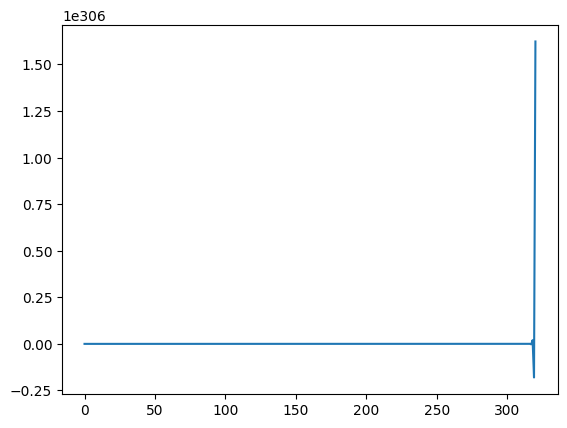

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#first let's define initial values for initializing the object for the KF class
initial_v = 1
initial_w = 1
initial_torque_left = 1
initial_torque_right = 1
meas_velocity = 0
meas_angular_velocity = 0
kf = KF( initial_v , initial_w ,  initial_torque_left , initial_torque_right )
meas_variance = 0.01
time = 0
DT = 1 # time step
v_reference = 4 * time
w_reference = 5 * time
C_4 = 5
C_5 = 5
c = 1 #Dont know the value
#Num_steps = 100
#measurement step, ie observations that come out of the robot dynamic equations
#ci = initial_torque_left + initial_torque_right
#meas_velocity = meas_velocity + (I/R) * ci * DT
#meas_angular_velocity = meas_angular_velocity + (l * m) / R * (ci) * DT  # model of angular velocity
#Lets add noise to the measured values.
#robot parameters
I = 0.1
l = 1
r = 1
m = 10

err_v = []
err_w = []
while (time<1000) :
    kf.predict(DT , initial_torque_left , initial_torque_right)
    ci = initial_torque_left + initial_torque_right
    meas_velocity = meas_velocity + ((I/r)*ci*DT)
    meas_angular_velocity = meas_angular_velocity + (((l * m)/r)*(ci)*DT)
    meas_velocity = meas_velocity +  np.random.randn() * np.sqrt(meas_variance)
    meas_angular_velocity = meas_angular_velocity + np.random.randn() * np.sqrt(meas_variance)
    # print("New")
    # print(time)
    #print(meas_velocity , meas_angular_velocity )
    if (time != 0 and time % 2 == 0) :
        # print("New",time)
        # print(meas_velocity , meas_angular_velocity )
        kf.update(meas_velocity , meas_angular_velocity , meas_variance)
        mean = kf.mean
        mean = np.array(mean)
        velocity = mean[0][0]
        angular_velocity = mean[1][0]
        # print("Velcoity")
        # print(velocity,angular_velocity)
        v_reference = 4 * time
        w_reference = 5 * time
        error_velocity = v_reference - velocity
        error_angular = w_reference - angular_velocity
        # print("Error")
        # print(error_velocity,error_angular)
        torque_left  = (((m * r)/2) * (4 + C_4 * error_velocity)) - (((I*r)/(2*c)) * (5 + C_5 * error_angular))
        torque_right = (((m * r)/2) * (4 + C_4 * error_velocity)) + (((I*r)/(2*c)) * (5 + C_5 * error_angular))
        initial_torque_left = torque_left
        initial_torque_right = torque_right
        err_v.append(error_velocity)
        err_w.append(error_angular)
    time = time + DT

#err_v = np.array(err_v[:])
#err_w = np.array(err_w[:])
print(len(err_v))
print(err_v)
plt.plot(err_v)
# plt.plot(err_w)



-0.033514481837402604

In [ ]:
import matplotlib.pyplot as plt

kf = KF( initial_v = 1.0 , initial_w= 1.0 ,  torque_left = 1.0 , torque_right = 1.0 )

DT = 0.1
Num_steps = 10
mus = [] #store the mean

covs = [] #store the covariance

for i in range (Num_steps) :
    covs.append(kf.cov)
    mus.append(kf.mean)

    kf.predict(dt = DT)

mus = np.array(mus)
#print(mus[:,0])
plt.plot(mus[:,0])
plt.plot(mus[:,1])
#plt.title('linear_velocity')







TypeError: ignored

In [ ]:
mus = [] #store the mean

covs = [] #store the covariance

meas_velocity = 0.2
meas_angular_velocity = 0.2

I = 0.1
R = 1
l = 1
m = 10
ci = 2.0
for i in range (Num_steps) :
    covs.append(kf.cov)
    mus.append(kf.mean)
    kf.predict(dt = DT)
    meas_velocity = meas_velocity + (I/R) * ci * DT  # measurement of velocity
    meas_angular_velocity = meas_angular_velocity + (l * m) / R * (ci) * DT  # model of angular velocity
    if i != 0 and i % 2 == 0 :
        kf.update (meas_velocity = meas_velocity +  np.random.randn() * np.sqrt(meas_variance) , meas_angular_velocity = meas_angular_velocity + np.random.randn() * np.sqrt(meas_variance) , meas_variance = meas_variance)




mus = np.array(mus)
#print(mus[:,0])
plt.plot(mus[:,0])
plt.plot(mus[:,1])
#plt.title('linear_velocity')

NameError: ignored